#                                       Football Matches Dataset and Covid dataset Analysis

Student: Eya Gammoudi     
Professor: Dr. Dhafer Malouche    
TA: Nada Hassan       


# Plan:

#  1-Abstract
##   2- Code
##   3- Discussion
##   4- Conclusion

# Abstract 

The chosen dataset consists of 43,170 results of international football matches.
This dataset is distinguished by the number of observations that are taken into account: 43,170 . For every single observation, this dataset analyses 9 variables. These variables can be splitted into two categories: numerical and catagorical.
* The numerical variables are:              
date                           
home_score                         
away_score                     
* The catagorical variables are:             
home_team        
away_team     
tournament     
city         
country             
neutral           

So through this data analysis I hope to achieve 2 things, the first is that I get to improve my data analysis skills through creating graphs and numerical analysis. The second is to study the factors that might affect the results of a footbal match. 

# Code

First I will start by importing the library and the csv file which conyains the needed dataset. Next I will define the conditions needed to identify when the team loses, wins or draws and that is by substructing the away_score from the home_score. If the result is less than 0 then the result is win, else if the result is bigger than 0 then the result is lose or else if the result is equal to 0 then it is draw. Next I will be studying the frequency of each case and that is by using the command (value_counts()) and by stting (normalize=True), so that we get the percentage of each case.
NOTE: The command: unique() is used in order to compute each country only ince in case it was repeated more than one time in the dataset and that is to assure the credibility of the results.

In [215]:
import pandas as pd

In [216]:
df=pd.read_csv("results.csv")

In [222]:
df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw


In [223]:
x=df['home_score']-df['away_score']
conditions=[(x<0), (x>0), (x==0)]

In [224]:
values=['win','lose','draw']

In [225]:
import numpy as np

In [226]:
df['result']=np.select(conditions, values)

In [227]:
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose


In [228]:
df['result'].value_counts()

lose    21009
win     12224
draw     9955
Name: result, dtype: int64

In [229]:
df['result'].value_counts(normalize=True)

lose    0.486455
win     0.283042
draw    0.230504
Name: result, dtype: float64

In [230]:
x=df['result'].value_counts()

In [231]:
x=np.array(x)

In [232]:
x

array([21009, 12224,  9955], dtype=int64)

In [233]:
N=x.sum()

In [234]:
N

43188

In [235]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [236]:
CI_win=proportion_confint(count=x[1], nobs=N, alpha=(1-.95))

In [237]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [238]:
CI_draw=proportion_confint(count=x[2], nobs=N, alpha=(1-.95))

In [239]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

In [240]:
df['country'].unique()

array(['Scotland', 'England', 'Wales', 'Ireland', 'United States',
       'Uruguay', 'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Bohemia', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Spain', 'Japan', 'Brazil', 'Paraguay', 'China PR',
       'Canada', 'Estonia', 'Guatemala', 'Czechoslovakia', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'Northern Ireland', 'Australia', 'Lithuania', 'Turkey', 'Mexico',
       'Aruba', 'Soviet Union', 'Haiti', 'Philippines', 'Bulgaria',
       'Jamaica', 'Kenya', 'Czech Republic', 'Peru', 'Honduras',
       'British Guyana', 'Uganda', 'El Salvador', 'Barbados',
       'Irish Free State', 'Trinidad and Tobago', 'Greece', 'Curaçao',
       'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 'Panama', 'B

## 1- Egypt:

In [241]:
dfegy=df[df['country']=='Egypt']

In [242]:
dfegy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,lose


In [243]:
conditions=[
    (dfegy['tournament']=='Friendly'),
    (dfegy['tournament']!='Friendly')
]

In [244]:
values=['Friendly', 'official']

In [245]:
dfegy['typematch']=np.select(conditions, values)

C:\Users\AUC\AppData\Local\Temp/ipykernel_17108/160527380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['typematch']=np.select(conditions, values)


In [246]:
dfegy['typematch'].value_counts()

official    226
Friendly    181
Name: typematch, dtype: int64

In [247]:
x=pd.crosstab(dfegy['typematch'], dfegy['result'], margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,37,99,45,181
official,40,139,47,226
All,77,238,92,407


In [248]:
x=np.array(x)
x

array([[ 37,  99,  45, 181],
       [ 40, 139,  47, 226],
       [ 77, 238,  92, 407]], dtype=int64)

In [249]:
CI_egywin_friendly=proportion_confint(count=x[0,2], nobs=x[0,3], alpha=(1-.95))
CI_egywin_friendly

(0.1856528084886489, 0.3115847605721246)

In [250]:
CI_egywin_official=proportion_confint(count=x[1,2], nobs=x[1,3], alpha=(1-.95))
CI_egywin_official

(0.1550517855722795, 0.2608774179675435)

In [251]:
ci_egywin={}
ci_egywin['Typematch']=['Friendly','official']
ci_egywin['lb']=[CI_egywin_friendly[0], CI_egywin_official[0]]
ci_egywin['ub']=[CI_egywin_friendly[1],CI_egywin_official[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,Typematch,lb,ub
0,Friendly,0.185653,0.311585
1,official,0.155052,0.260877


([<matplotlib.axis.YTick at 0x1ea99563fd0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'official')])

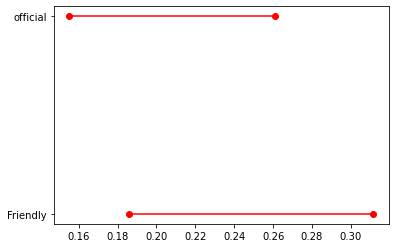

In [252]:
import matplotlib.pyplot as plt
for lb, ub, y in zip(df_ci['lb'], df_ci['ub'], range(len(df_ci))):
    plt.plot((lb,ub),(y,y), 'ro-')
plt.yticks(range(len(df_ci)), list(df_ci['Typematch']))

In [253]:
dfegy['home']=(dfegy['home_team']=='Egypt')

C:\Users\AUC\AppData\Local\Temp/ipykernel_17108/2175071764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['home']=(dfegy['home_team']=='Egypt')


In [254]:
dfegy['home'].value_counts()

True     258
False    149
Name: home, dtype: int64

In [37]:
x=pd.crosstab(dfegy['home'], dfegy['result'], margins=True)
x

result,draw,lose,win,All
home,,,,
False,33,67,49,149
True,44,171,43,258
All,77,238,92,407


In [38]:
dfegy.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,typematch,home
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw,Friendly,True
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose,official,True
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose,Friendly,True
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw,Friendly,True


In [39]:
x=np.array(x)
x

array([[ 33,  67,  49, 149],
       [ 44, 171,  43, 258],
       [ 77, 238,  92, 407]], dtype=int64)

In [40]:
CI_egywin_home=proportion_confint(count=x[1,2], nobs=x[1,3], alpha=(1-.95))
CI_egywin_home

(0.12119174183927744, 0.21214159149405587)

In [41]:
CI_egywin_away=proportion_confint(count=x[0,2],nobs=x[0,3], alpha=(1-.95))
CI_egywin_away

(0.25342513144684364, 0.40429298935852553)

In [42]:
ci_egywin = {}
ci_egywin['home'] = ['Yes','No']
ci_egywin['lb'] = [CI_egywin_home[0],CI_egywin_away[0]]
ci_egywin['ub'] = [CI_egywin_home[1],CI_egywin_away[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,home,lb,ub
0,Yes,0.121192,0.212142
1,No,0.253425,0.404293


([<matplotlib.axis.YTick at 0x1ea9821dd60>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

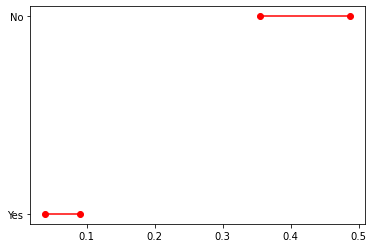

In [67]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

## 2-Brazil 

In [45]:
dfbra=df[df['country']=='Brazil']

In [48]:
dfbra.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
503,5/11/1919,Brazil,Chile,6,0,Copa América,Rio de Janeiro,Brazil,False,lose
505,5/13/1919,Argentina,Uruguay,2,3,Copa América,Rio de Janeiro,Brazil,True,win
507,5/17/1919,Chile,Uruguay,0,2,Copa América,Rio de Janeiro,Brazil,True,win
508,5/18/1919,Brazil,Argentina,3,1,Copa América,Rio de Janeiro,Brazil,False,lose
510,5/22/1919,Argentina,Chile,4,1,Copa América,Rio de Janeiro,Brazil,True,lose


In [49]:
conditions=[
    (dfbra['tournament']=='Friendly'),
    (dfbra['tournament']!='Friendly')
]

In [50]:
values=['Friendly', 'Official']

In [51]:
dfbra['typematch']=np.select(conditions,values)

C:\Users\AUC\AppData\Local\Temp/ipykernel_17108/724107232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbra['typematch']=np.select(conditions,values)


In [52]:
dfbra['typematch'].value_counts()

Official    373
Friendly    194
Name: typematch, dtype: int64

now I am going to compare the probability of win/lose/draw according to the type of match

In [53]:
y=pd.crosstab(dfbra['typematch'],dfbra['result'], margins=True)
y

result,draw,lose,win,All
typematch,,,,
Friendly,38,146,10,194
Official,80,190,103,373
All,118,336,113,567


In [54]:
y=np.array(y)
y

array([[ 38, 146,  10, 194],
       [ 80, 190, 103, 373],
       [118, 336, 113, 567]], dtype=int64)

In [55]:
CI_brawin_friendly=proportion_confint(count=y[0,2],nobs=y[0,3],alpha=(1-.95))
CI_brawin_friendly

(0.02043249489958943, 0.08266028860556521)

In [56]:
CI_brawin_official=proportion_confint(count=y[1,2],nobs=y[1,3],alpha=(1-.95))
CI_brawin_official

(0.23076768031938502, 0.32151114005595016)

Now I will be plotting the confidence intervals

In [57]:
ci_brawin={}
ci_brawin['Typematch']=['Friendly','Official']
ci_brawin['lb']=[CI_brawin_friendly[0],CI_brawin_official[0]]
ci_brawin['ub'] = [CI_brawin_friendly[1],CI_brawin_official[1]]
df_ci= pd.DataFrame(ci_brawin)
df_ci

,Typematch,lb,ub
0,Friendly,0.020432,0.082660
1,Official,0.230768,0.321511


([<matplotlib.axis.YTick at 0x1ea9816c7f0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

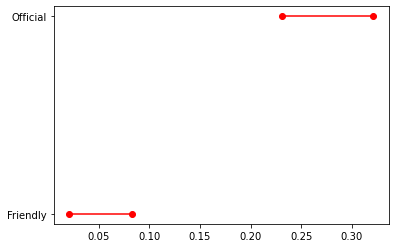

In [58]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Now I will check the impact of fans by comparing the probability of winning between home matches and away matches.

In [59]:
dfbra['home']=(dfbra['home_team']=='Brazil')

C:\Users\AUC\AppData\Local\Temp/ipykernel_17108/3044022109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbra['home']=(dfbra['home_team']=='Brazil')


In [60]:
dfbra['home'].value_counts()

True     353
False    214
Name: home, dtype: int64

In [61]:
y=pd.crosstab(dfbra['home'],dfbra['result'],margins=True)
y

result,draw,lose,win,All
home,,,,
False,47,77,90,214
True,71,259,23,353
All,118,336,113,567


In [62]:
y=np.array(y)
y

array([[ 47,  77,  90, 214],
       [ 71, 259,  23, 353],
       [118, 336, 113, 567]], dtype=int64)

In [63]:
CI_brawin_away=proportion_confint(count=y[0,2], nobs=y[0,3],alpha=(1-.95))
CI_brawin_away

(0.35442145769233024, 0.48670003763477254)

In [64]:
CI_brawin_home=proportion_confint(count=y[1,2], nobs=y[1,3],alpha=(1-.95))
CI_brawin_home

(0.03940997596569566, 0.09090163876518252)

In [65]:
ci_brawin = {}
ci_brawin['home'] = ['Yes','No']
ci_brawin['lb'] = [CI_brawin_home[0],CI_brawin_away[0]]
ci_brawin['ub'] = [CI_brawin_home[1],CI_brawin_away[1]]
df_ci= pd.DataFrame(ci_brawin)
df_ci

,home,lb,ub
0,Yes,0.039410,0.090902
1,No,0.354421,0.486700


([<matplotlib.axis.YTick at 0x1ea981cafa0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

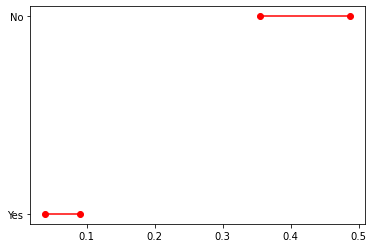

In [66]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

## 3-Scotland 

Now we will be studying Scotland

In [69]:
dfscot=df[df['country']=='Scotland']

Now I will create a variable type of the match friendly/not friendly and home/away from home match

In [70]:
conditions=[
    (dfscot['tournament']=='Friendly'),
    (dfscot['tournament']!='Friendly')
]

In [71]:
values=['Friendly', 'Official']

In [74]:
dfscot['typematch']=np.select(conditions , values)

C:\Users\AUC\AppData\Local\Temp/ipykernel_17108/2488230950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfscot['typematch']=np.select(conditions , values)


In [75]:
dfscot['typematch'].value_counts()

Official    297
Friendly    107
Name: typematch, dtype: int64

Now I will be comparing the probability of win/lose/draw by the tyoe of the match

In [76]:
x=pd.crosstab(dfscot['typematch'],dfscot['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,19,54,34,107
Official,64,177,56,297
All,83,231,90,404


In [77]:
x=np.array(x)
x

array([[ 19,  54,  34, 107],
       [ 64, 177,  56, 297],
       [ 83, 231,  90, 404]], dtype=int64)

In [78]:
CI_scotwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_scotwin_friendly

(0.22953573779233233, 0.4059782808992564)

In [79]:
CI_scotwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_scotwin_friendly

(0.22953573779233233, 0.4059782808992564)

In [81]:
CI_scotwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_scotwin_official

(0.1440669471299619, 0.2330374299744152)

In [82]:
ci_scotwin = {}
ci_scotwin['Typematch'] = ['Friendly','Official']
ci_scotwin['lb'] = [CI_scotwin_friendly[0],CI_scotwin_official[0]]
ci_scotwin['ub'] = [CI_scotwin_friendly[1],CI_scotwin_official[1]]
df_ci= pd.DataFrame(ci_scotwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.229536,0.405978
1,Official,0.144067,0.233037


([<matplotlib.axis.YTick at 0x1ea982952e0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

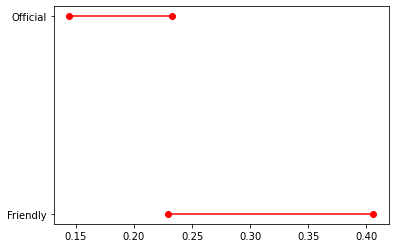

In [83]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Now I am going to check if the fans have any impact on the result of match and that is by comparing the probability of winning between home matches and away from home matches

In [84]:
dfscot['home']=(dfscot['home_team']=='Scotland')

C:\Users\AUC\AppData\Local\Temp/ipykernel_17108/3013079037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfscot['home']=(dfscot['home_team']=='Scotland')


In [85]:
dfscot['home'].value_counts()

True     376
False     28
Name: home, dtype: int64

In [86]:
x=pd.crosstab(dfscot['home'],dfscot['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,6,14,8,28
True,77,217,82,376
All,83,231,90,404


In [87]:
x=np.array(x)
x

array([[  6,  14,   8,  28],
       [ 77, 217,  82, 376],
       [ 83, 231,  90, 404]], dtype=int64)

In [89]:
CI_scotwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_scotwin_home

(0.17634563783879345, 0.25982457492716404)

In [90]:
CI_scotwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_scotwin_away

(0.11838535517233528, 0.4530432162562361)

In [91]:
ci_scotwin = {}
ci_scotwin['home'] = ['Yes','No']
ci_scotwin['lb'] = [CI_scotwin_home[0],CI_scotwin_away[0]]
ci_scotwin['ub'] = [CI_scotwin_home[1],CI_scotwin_away[1]]
df_ci= pd.DataFrame(ci_scotwin)
df_ci

,home,lb,ub
0,Yes,0.176346,0.259825
1,No,0.118385,0.453043


([<matplotlib.axis.YTick at 0x1ea992c5640>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

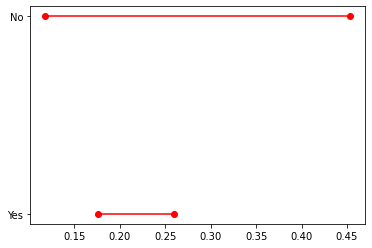

In [92]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

## 4-England: 

Now I will be studying the last country which is England

In [93]:
dfeng=df[df['country']=='England']

Now I will create a variable type of the match friendly/No friendly and home/away match

In [94]:
conditions=[
    (dfeng['tournament']=='Friendly'),
    (dfeng['tournament']!='Friendly')
]

In [95]:
values=['Friendly','Official']

In [96]:
dfeng['typematch'] = np.select(conditions, values)

C:\Users\AUC\AppData\Local\Temp/ipykernel_17108/834499208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfeng['typematch'] = np.select(conditions, values)


In [97]:
dfeng['typematch'].value_counts()

Official    431
Friendly    286
Name: typematch, dtype: int64

Comparing the probability of win/lose/draw by type of match

In [98]:
x=pd.crosstab(dfeng['typematch'],dfeng['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,72,156,58,286
Official,84,259,88,431
All,156,415,146,717


In [99]:
x=np.array(x)
x

array([[ 72, 156,  58, 286],
       [ 84, 259,  88, 431],
       [156, 415, 146, 717]], dtype=int64)

In [100]:
CI_engwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_friendly

(0.15619778812633506, 0.24939661746807051)

In [101]:
CI_engwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_engwin_official

(0.1661205581281346, 0.24223211008532247)

Plotting the Confidence intervals

In [102]:
ci_engwin = {}
ci_engwin['Typematch'] = ['Friendly','Official']
ci_engwin['lb'] = [CI_engwin_friendly[0],CI_engwin_official[0]]
ci_engwin['ub'] = [CI_engwin_friendly[1],CI_engwin_official[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.156198,0.249397
1,Official,0.166121,0.242232


([<matplotlib.axis.YTick at 0x1ea99334250>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

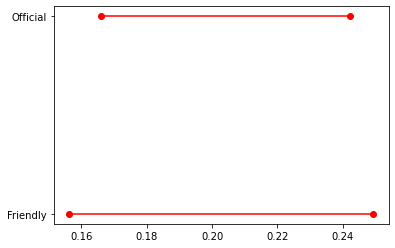

In [103]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Let's now check out the impact of fans on the match results. We will compare the probability of winning between home matches and away matches

In [104]:
dfeng['home']=(dfeng['home_team']=='England')

C:\Users\AUC\AppData\Local\Temp/ipykernel_17108/3357545504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfeng['home']=(dfeng['home_team']=='England')


In [105]:
dfeng['home'].value_counts()

True     464
False    253
Name: home, dtype: int64

In [106]:
x=pd.crosstab(dfeng['home'],dfeng['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,55,115,83,253
True,101,300,63,464
All,156,415,146,717


In [107]:
x=np.array(x)
x

array([[ 55, 115,  83, 253],
       [101, 300,  63, 464],
       [156, 415, 146, 717]], dtype=int64)

In [108]:
CI_engwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_engwin_home

(0.10460752863595074, 0.1669441955019803)

In [109]:
CI_engwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_away

(0.27020958414722984, 0.3859168980662089)

In [110]:
ci_engwin = {}
ci_engwin['home'] = ['Yes','No']
ci_engwin['lb'] = [CI_engwin_home[0],CI_engwin_away[0]]
ci_engwin['ub'] = [CI_engwin_home[1],CI_engwin_away[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,home,lb,ub
0,Yes,0.104608,0.166944
1,No,0.270210,0.385917


([<matplotlib.axis.YTick at 0x1ea9938be20>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

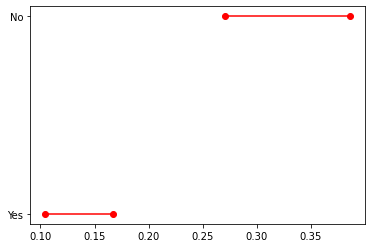

In [111]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

I will now write a Python function that can compare the Confidence Intervals of the means for
a given continuous variable according to groups defined by a categorical variable

In [116]:
 import pandas as pd
import numpy as np
import scipy.stats as st
def plot_diff_in_means(data: pd.DataFrame,alpha, col1: str, col2: str):
    n = data.groupby(col1)[col2].count()
    cat = list(data.groupby(col1, as_index=False)[col2].count()[col1])
    mean = data.groupby(col1)[col2].agg('mean')
    lower = st.t.interval(alpha = alpha, df=n-1, loc = mean, scale = se)[0]
    upper = st.t.interval(alpha = alpha, df =n-1, loc = mean, scale = se)[1]
    for upper, mean, lower, y in zip(upper, mean, lower, cat):
     plt.plot((lower, mean, upper), (y, y, y), 'b.-')
    plt.yticks(
    range(len(n)),
    list(data.groupby(col1, as_index = False)[col2].count()[col1])
   )



In [ ]:
 plot_diff_in_means(data = df,alpha=.95, col1 = 'Country', col2 = '')


# Discussion:

## 1- Egypt

Below I will be discussing the results that I found in Egypt:    
Based on the crosstab that I did, the results show that when the match is friendly the results are less than when the match is official since the total of friendly matches is 181 and the total of official matches is 226. In fact, the results thet I found when the match is friendly are:     
37 draw/ 99 loss/ 45 win    
The percentage of winning in a friendly match from all the matches
(friendly and not) is 11% while the probability of losing is 24%.

While the results that I found when the match is official are:   
40 draw/ 139 loss/ 47 win.    
The percentage of winning in an official match from all the matches( friendly or not) is 11% while the probability of losing is 34%

After finding these results I computed the confidence interval for the friendly match which is:       
(0.1856528084886489, 0.3115847605721246)
And the confidence interval for the official match which is:   
(0.1550517855722795, 0.2608774179675435)
                                     
Next, after plotting the confidence intervals, we notive that there is some overlapping which shows that there is no significance difference between them.
==> This shows that if the match is friendly or official, the results are not affected 
* Next I decided to study the effect of the fans in a match, and in order to study this I compared the results of the matches that the Egyptian team had in Egypt, with the matches they had putside of Egypt.
And from 407 matches, they had 258 at home match from which they won 43 and lost 171 and got 44 draw. And they had 149 match away from which they won 49 and lost 67.     
Next the confidence intervals found and the graphs show that there is no overlapping between the two confidence intervals which shows that there is a significant statistical difference between the two intervals. This leads to conclude that the factor of plating at home or not affects the results of the match



# 2- Brazil

Below I will be discussing the results that I found in Brazil:
Based on the crosstab that I did, the results show that when the match is friendly the results are less than when the match is official since the total of friendly matches is 194 and the total of official matches is 373. In fact, the results thet I found when the match is friendly are:
38 draw/ 146 loss/ 10 win
The percentage of winning in a friendly match from all the matches (friendly and not) is 1.7% while the probability of losing is 33%.

While the results that I found when the match is official are:
80 draw/ 190 loss/ 103 win.
The percentage of winning in an official match from all the matches( friendly or not) is 18% while the probability of losing is 33.5%

After finding these results I computed the confidence interval for the friendly match which is:
(0.02043249489958943, 0.08266028860556521)    
And the confidence interval for the official match which is:
(0.23076768031938502, 0.32151114005595016)

Next, after plotting the confidence intervals, we notice that there is no overlapping which shows that there is a stistical significance difference between them. ==> This shows that the results get affected if the match is friendly or official.

Next I decided to study the effect of the fans in a match, and in order to study this I compared the results of the matches that the Brazilian team had in Brazil, with the matches they had outside of Brazil. And from 567 matches, they had 353 at home match from which they won 23 and lost 259 and got 71 draw. And they had 214 match away from which they won 90 and lost 77.
Next the confidence intervals found and the graphs show that there is no overlapping between the two confidence intervals which shows that there is a significant statistical difference between the two intervals. This leads to conclude that the factor of plating at home or not affects the results of the match

# 3- Scotland:

Below I will be discussing the results that I found in Scotland:
Based on the crosstab that I did, the results show that when the match is friendly the results are less than when the match is official since the total of friendly matches is 107 and the total of official matches is 297. In fact, the results thet I found when the match is friendly are:
19 draw/ 54 loss/ 34 win
The percentage of winning in a friendly match from all the matches (friendly and not) is 8.4% while the probability of losing is 13.3%.

While the results that I found when the match is official are:
64 draw/ 177 loss/ 56 win.
The percentage of winning in an official match from all the matches( friendly or not) is 13.8% while the probability of losing is 43.8%

After finding these results I computed the confidence interval for the friendly match which is:
(0.22953573779233233, 0.4059782808992564)    
And the confidence interval for the official match which is:
(0.1440669471299619, 0.2330374299744152)

Next, after plotting the confidence intervals, we notice that there is no overlapping which shows that there is a stistical significance difference between them. ==> This shows that the results get affected if the match is friendly or official.

Next I decided to study the effect of the fans in a match, and in order to study this I compared the results of the matches that the team had in Scotland, with the matches they had outside of Scotland. And from 404 matches, they had 376 at home match from which they won 82 and lost 217 and got 77 draw. And they had 28 match away from which they won 8 and lost 14.
Next the confidence intervals found and the graphs show that there is overlapping between the two confidence intervals which shows that there is no significant statistical difference between the two intervals. This leads to conclude that the factor of plating at home or not does not affect affect the results of the match for Scotland

# 4- England:

Below I will be discussing the results that I found in England:
Based on the crosstab that I did, the results show that when the match is friendly the results are less than when the match is official since the total of friendly matches is 286 and the total of official matches is 431. In fact, the results thet I found when the match is friendly are:
72 draw/ 156 loss/ 58 win
The percentage of winning in a friendly match from all the matches (friendly and not) is 8% while the probability of losing is 21.7%.

While the results that I found when the match is official are:
84 draw/ 259 loss/ 88 win.
The percentage of winning in an official match from all the matches( friendly or not) is 12.2% while the probability of losing is 36.12%

After finding these results I computed the confidence interval for the friendly match which is:
(0.15619778812633506, 0.24939661746807051)    
And the confidence interval for the official match which is:
(0.1661205581281346, 0.24223211008532247)

Next, after plotting the confidence intervals, we notice that there is overlapping which shows that there is no stistical significance difference between them. ==> This shows that the results do not get affected if the match is friendly or official, for England.

Next I decided to study the effect of the fans in a match, and in order to study this I compared the results of the matches that the team had in England, with the matches they had outside of England. And from 717 matches, they had 464 at home match from which they won 63 and lost 300 and got 101 draw. And they had 253 match away from which they won 83 and lost 115.
Next the confidence intervals found and the graphs show that there is overlapping between the two confidence intervals which shows that there is no significant statistical difference between the two intervals. This leads to conclude that the factor of plating at home or not does not affect affect the results of the match for England.

# PART II:

In [118]:
import pandas as pd

In [122]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [123]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [124]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua & Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia & Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', 'Côte d\x92Ivoire', 'Cameroon',
       'Congo - Kinshasa', 'Congo - Brazzaville', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', '

In [125]:
import numpy as np

In [126]:
dfegy=df[df['country']=='Egypt']

In [127]:
stats=dfegy.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [128]:
stats

dcases                 
                mean         std size
weekdays                             
Fri       567.161616  428.533849   99
Mon       561.846939  442.137949   98
Sat       558.806122  421.803605   98
Sun       545.520408  422.358748   98
Thu       567.683673  410.020004   98
Tue       566.153061  419.125460   98
Wed       561.479592  406.337812   98

In [129]:
statsm=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})
statsm

dcases                 
              mean         std size
month                              
Apr     504.133333  354.246465   60
Aug     145.806452   60.683224   62
Dec     792.709677  300.346870   62
Feb     374.409091  288.087868   44
Jan     899.645161  251.335970   31
Jul     463.661290  437.595552   62
Jun    1032.633333  454.674216   60
Mar     329.290323  310.292849   62
May     879.774194  346.475245   62
Nov     598.616667  370.082496   60
Oct     497.580645  362.321547   62
Sep     339.033333  225.855584   60

In [130]:
import numpy as np
import scipy.stats 

In [131]:
statsm.index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='month')

In [132]:
ci95_hi = []
ci95_lo = []

In [133]:
for i in statsm.index:
    m, s, n = statsm.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [134]:
ci95_hi

[596.4171621669087,
 161.3429084204986,
 869.6061543814164,
 463.0084047471138,
 993.3598571863843,
 575.6969386179874,
 1151.0793353591891,
 408.7332244407111,
 968.4807139392825,
 695.0258988600798,
 590.3442237843955,
 397.87038622259695]

In [135]:
ci95_lo

[411.8495044997579,
 130.26999480530787,
 715.8132004572933,
 285.8097770710681,
 805.9304653942609,
 351.6256420271739,
 914.1873313074777,
 249.84742072057924,
 791.0676731574916,
 502.2074344732536,
 404.8170665381852,
 280.19628044406977]

In [136]:
statsm['ci95_hi'] = ci95_hi
statsm['ci95_lo'] = ci95_lo
print(statsm)

            dcases                       ci95_hi     ci95_lo
              mean         std size                         
month                                                       
Apr     504.133333  354.246465   60   596.417162  411.849504
Aug     145.806452   60.683224   62   161.342908  130.269995
Dec     792.709677  300.346870   62   869.606154  715.813200
Feb     374.409091  288.087868   44   463.008405  285.809777
Jan     899.645161  251.335970   31   993.359857  805.930465
Jul     463.661290  437.595552   62   575.696939  351.625642
Jun    1032.633333  454.674216   60  1151.079335  914.187331
Mar     329.290323  310.292849   62   408.733224  249.847421
May     879.774194  346.475245   62   968.480714  791.067673
Nov     598.616667  370.082496   60   695.025899  502.207434
Oct     497.580645  362.321547   62   590.344224  404.817067
Sep     339.033333  225.855584   60   397.870386  280.196280


In [137]:
df_ci= pd.DataFrame(statsm)

In [138]:
df_ci

dcases                       ci95_hi     ci95_lo
              mean         std size                         
month                                                       
Apr     504.133333  354.246465   60   596.417162  411.849504
Aug     145.806452   60.683224   62   161.342908  130.269995
Dec     792.709677  300.346870   62   869.606154  715.813200
Feb     374.409091  288.087868   44   463.008405  285.809777
Jan     899.645161  251.335970   31   993.359857  805.930465
Jul     463.661290  437.595552   62   575.696939  351.625642
Jun    1032.633333  454.674216   60  1151.079335  914.187331
Mar     329.290323  310.292849   62   408.733224  249.847421
May     879.774194  346.475245   62   968.480714  791.067673
Nov     598.616667  370.082496   60   695.025899  502.207434
Oct     497.580645  362.321547   62   590.344224  404.817067
Sep     339.033333  225.855584   60   397.870386  280.196280

In [139]:
df_ci.index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='month')

In [140]:
df_ci['month']=df_ci.index

In [141]:
df_ci

dcases                       ci95_hi     ci95_lo month
              mean         std size                               
month                                                             
Apr     504.133333  354.246465   60   596.417162  411.849504   Apr
Aug     145.806452   60.683224   62   161.342908  130.269995   Aug
Dec     792.709677  300.346870   62   869.606154  715.813200   Dec
Feb     374.409091  288.087868   44   463.008405  285.809777   Feb
Jan     899.645161  251.335970   31   993.359857  805.930465   Jan
Jul     463.661290  437.595552   62   575.696939  351.625642   Jul
Jun    1032.633333  454.674216   60  1151.079335  914.187331   Jun
Mar     329.290323  310.292849   62   408.733224  249.847421   Mar
May     879.774194  346.475245   62   968.480714  791.067673   May
Nov     598.616667  370.082496   60   695.025899  502.207434   Nov
Oct     497.580645  362.321547   62   590.344224  404.817067   Oct
Sep     339.033333  225.855584   60   397.870386  280.196280   Sep

In [142]:
df_ci.columns

MultiIndex([( 'dcases', 'mean'),
            ( 'dcases',  'std'),
            ( 'dcases', 'size'),
            ('ci95_hi',     ''),
            ('ci95_lo',     ''),
            (  'month',     '')],
           )

In [143]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x1ea96a64130>,
 [Text(0, 0, 'Apr'),
  Text(0, 1, 'Aug'),
  Text(0, 2, 'Dec'),
  Text(0, 3, 'Feb'),
  Text(0, 4, 'Jan'),
  Text(0, 5, 'Jul'),
  Text(0, 6, 'Jun'),
  Text(0, 7, 'Mar'),
  Text(0, 8, 'May'),
  Text(0, 9, 'Nov'),
  Text(0, 10, 'Oct'),
  Text(0, 11, 'Sep')])

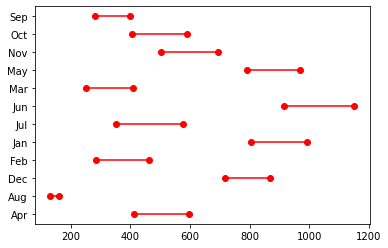

In [144]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['month']))

In [145]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [146]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [147]:
dfegy=df[df['country']=='Egypt']

In [148]:
import numpy as np

In [149]:
stats=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

In [150]:
stats=pd.DataFrame(stats)

In [151]:
stats.shape

(12, 3)

In [152]:
stats.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [153]:
stats.columns=['mean','std','size']

In [154]:
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [164]:
import numpy as np
from scipy.stats import norm,t

In [165]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [166]:
x=dfegy['dcases']

In [167]:
get_ci_lb(x)

529.7945911276133

In [168]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [169]:
get_ci_ub(x)

592.694491841819

In [170]:
ci_dcases=statsm=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

dcases                                          
              mean         std size   get_ci_lb    get_ci_ub
month                                                       
Jan     899.645161  251.335970   31  807.454383   991.835939
Feb     374.409091  288.087868   44  286.822374   461.995808
Mar     329.290323  310.292849   62  250.490694   408.089951
Apr     504.133333  354.246465   60  412.621768   595.644899
May     879.774194  346.475245   62  791.785956   967.762431
Jun    1032.633333  454.674216   60  915.178529  1150.088138
Jul     463.661290  437.595552   62  352.532828   574.789752
Aug     145.806452   60.683224   62  130.395798   161.217105
Sep     339.033333  225.855584   60  280.688649   397.378017
Oct     497.580645  362.321547   62  405.568201   589.593089
Nov     598.616667  370.082496   60  503.014220   694.219113
Dec     792.709677  300.346870   62  716.435854   868.983501

In [171]:
statsm.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [172]:
statsm.columns=['mean','std','size','lb','ub']

In [173]:
statsm['month']=statsm.index

In [174]:
statsm

,mean,std,size,lb,ub,month
month,,,,,,
Jan,899.645161,251.335970,31,807.454383,991.835939,Jan
Feb,374.409091,288.087868,44,286.822374,461.995808,Feb
Mar,329.290323,310.292849,62,250.490694,408.089951,Mar
Apr,504.133333,354.246465,60,412.621768,595.644899,Apr
May,879.774194,346.475245,62,791.785956,967.762431,May
Jun,1032.633333,454.674216,60,915.178529,1150.088138,Jun
Jul,463.661290,437.595552,62,352.532828,574.789752,Jul
Aug,145.806452,60.683224,62,130.395798,161.217105,Aug
Sep,339.033333,225.855584,60,280.688649,397.378017,Sep


In [175]:
import matplotlib.pyplot as plt

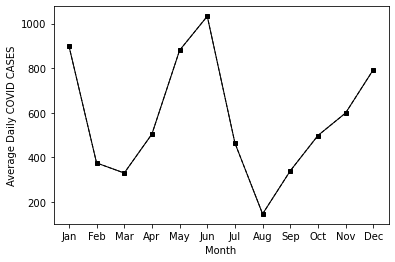

In [176]:
plt.plot( 'month', 'mean', data=statsm, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

Now I will be making the graph but nly for the year 2021

In [177]:
df['date'][0]

'2020-02-24'

In [178]:
df['date'] = pd. to_datetime(df['date'],format='%Y-%m-%d')

In [179]:
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [180]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [181]:
df['year'][0]

2020

I compute now, by country, by year, by month the following statistics on the daily COVID cases: mean, std, size, CI(95%) LB, and UB.

In [182]:
statsdcases=df.groupby(['country','year','month']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [183]:
statsdcases

dcases                                  \
                               mean          std  size    get_ci_lb   
country     year month                                                
Afghanistan 2020 Jan            NaN          NaN   NaN          NaN   
                 Feb       0.833333     2.041241   6.0    -1.308818   
                 Mar       5.258065    10.871883  31.0     1.270225   
                 Apr      55.366667    40.385627  30.0    40.286426   
                 May     430.741935   266.692078  31.0   332.918491   
...                             ...          ...   ...          ...   
Zimbabwe    2021 Aug     513.322581   386.841948  31.0   371.427809   
                 Sep     201.566667   135.119789  30.0   151.112108   
                 Oct      69.580645    58.035492  31.0    48.293055   
                 Nov      54.933333    82.622087  30.0    24.081739   
                 Dec    2536.548387  2572.199964  31.0  1593.057823   

                                     
                          get_ci_ub  
country     year month               
Afghanistan 2020 Jan            NaN  
                 Feb       2.975485  
                 Mar       9.245904  
                 Apr      70.446908  
                 May     528.565379  
...                             ...  
Zimbabwe    2021 Aug     655.217353  
                 Sep     252.021225  
                 Oct      90.868235  
                 Nov      85.784928  
                 Dec    3480.038951  

[4488 rows x 5 columns]

In [185]:
statsdcases=statsdcases.reset_index()

In [186]:
statsdcases

country  year month       dcases                                  \
                                      mean          std  size    get_ci_lb   
0     Afghanistan  2020   Jan          NaN          NaN   NaN          NaN   
1     Afghanistan  2020   Feb     0.833333     2.041241   6.0    -1.308818   
2     Afghanistan  2020   Mar     5.258065    10.871883  31.0     1.270225   
3     Afghanistan  2020   Apr    55.366667    40.385627  30.0    40.286426   
4     Afghanistan  2020   May   430.741935   266.692078  31.0   332.918491   
...           ...   ...   ...          ...          ...   ...          ...   
4483     Zimbabwe  2021   Aug   513.322581   386.841948  31.0   371.427809   
4484     Zimbabwe  2021   Sep   201.566667   135.119789  30.0   151.112108   
4485     Zimbabwe  2021   Oct    69.580645    58.035492  31.0    48.293055   
4486     Zimbabwe  2021   Nov    54.933333    82.622087  30.0    24.081739   
4487     Zimbabwe  2021   Dec  2536.548387  2572.199964  31.0  1593.057823   

                   
        get_ci_ub  
0             NaN  
1        2.975485  
2        9.245904  
3       70.446908  
4      528.565379  
...           ...  
4483   655.217353  
4484   252.021225  
4485    90.868235  
4486    85.784928  
4487  3480.038951  

[4488 rows x 8 columns]

In [187]:
statsEgy=statsdcases[(statsdcases['country']=='Egypt') & (statsdcases['year']==2021)]

In [188]:
statsEgy

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1236   Egypt  2021   Jan   899.645161  251.335970  31.0   807.454383   
1237   Egypt  2021   Feb   588.321429   40.989659  28.0   572.427298   
1238   Egypt  2021   Mar   635.709677   36.309038  31.0   622.391415   
1239   Egypt  2021   Apr   847.366667   92.416405  30.0   812.857814   
1240   Egypt  2021   May  1132.193548   55.087457  31.0  1111.987306   
1241   Egypt  2021   Jun   621.066667  197.770841  30.0   547.217821   
1242   Egypt  2021   Jul    96.129032   61.659139  31.0    73.512277   
1243   Egypt  2021   Aug   134.806452   73.635326  31.0   107.796796   
1244   Egypt  2021   Sep   536.100000  151.276488  30.0   479.612431   
1245   Egypt  2021   Oct   854.612903   53.664189  31.0   834.928720   
1246   Egypt  2021   Nov   918.700000  248.217528  30.0   826.014052   
1247   Egypt  2021   Dec   870.870968  212.967093  31.0   792.754007   

                   
        get_ci_ub  
1236   991.835939  
1237   604.215559  
1238   649.027940  
1239   881.875520  
1240  1152.399791  
1241   694.915513  
1242   118.745787  
1243   161.816107  
1244   592.587569  
1245   874.297087  
1246  1011.385948  
1247   948.987928

In [189]:
statsEgy.columns

MultiIndex([('country',          ''),
            (   'year',          ''),
            (  'month',          ''),
            ( 'dcases',      'mean'),
            ( 'dcases',       'std'),
            ( 'dcases',      'size'),
            ( 'dcases', 'get_ci_lb'),
            ( 'dcases', 'get_ci_ub')],
           )

In [190]:
statsEgy.columns=['country','year','month','mean','std','size','lb','ub']

Now I will be drawing the average daily COVID cases by month in Egypt

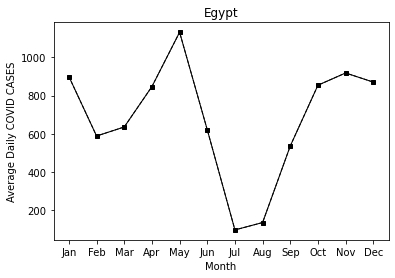

In [191]:
plt.plot( 'month', 'mean', data=statsEgy, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsEgy, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

In [192]:
ci_lb_ub=[statsEgy['lb'],statsEgy['ub']]

In [193]:
err = np.abs(ci_lb_ub - statsEgy['mean'].to_numpy())

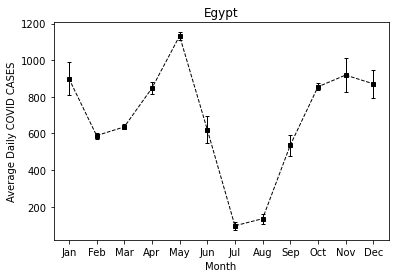

In [194]:
plt.errorbar('month', 'mean',  yerr=err, data=statsEgy,marker='s', capsize=2,
             color='black', markersize=4, linewidth=1, linestyle='--')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

The comparision between 2020 and 2021

In [195]:
statsEgy21=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2021)]
statsEgy21

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1236   Egypt  2021   Jan   899.645161  251.335970  31.0   807.454383   
1237   Egypt  2021   Feb   588.321429   40.989659  28.0   572.427298   
1238   Egypt  2021   Mar   635.709677   36.309038  31.0   622.391415   
1239   Egypt  2021   Apr   847.366667   92.416405  30.0   812.857814   
1240   Egypt  2021   May  1132.193548   55.087457  31.0  1111.987306   
1241   Egypt  2021   Jun   621.066667  197.770841  30.0   547.217821   
1242   Egypt  2021   Jul    96.129032   61.659139  31.0    73.512277   
1243   Egypt  2021   Aug   134.806452   73.635326  31.0   107.796796   
1244   Egypt  2021   Sep   536.100000  151.276488  30.0   479.612431   
1245   Egypt  2021   Oct   854.612903   53.664189  31.0   834.928720   
1246   Egypt  2021   Nov   918.700000  248.217528  30.0   826.014052   
1247   Egypt  2021   Dec   870.870968  212.967093  31.0   792.754007   

                   
        get_ci_ub  
1236   991.835939  
1237   604.215559  
1238   649.027940  
1239   881.875520  
1240  1152.399791  
1241   694.915513  
1242   118.745787  
1243   161.816107  
1244   592.587569  
1245   874.297087  
1246  1011.385948  
1247   948.987928

In [196]:
statsEgy20=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2020)]
statsEgy20

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1224   Egypt  2020   Jan          NaN         NaN   NaN          NaN   
1225   Egypt  2020   Feb     0.062500    0.250000  16.0    -0.070716   
1226   Egypt  2020   Mar    22.870968   20.228267  31.0    15.451179   
1227   Egypt  2020   Apr   160.900000   54.996144  30.0   140.364102   
1228   Egypt  2020   May   627.354839  330.723908  31.0   506.044330   
1229   Egypt  2020   Jun  1444.200000  176.114853  30.0  1378.437633   
1230   Egypt  2020   Jul   831.193548  326.183427  31.0   711.548501   
1231   Egypt  2020   Aug   156.806452   42.607839  31.0   141.177770   
1232   Egypt  2020   Sep   141.966667   23.389481  30.0   133.232891   
1233   Egypt  2020   Oct   140.548387   24.650678  31.0   131.506445   
1234   Egypt  2020   Nov   278.533333   71.137426  30.0   251.970182   
1235   Egypt  2020   Dec   714.548387  354.179036  31.0   584.634468   

                   
        get_ci_ub  
1224          NaN  
1225     0.195716  
1226    30.290756  
1227   181.435898  
1228   748.665347  
1229  1509.962367  
1230   950.838595  
1231   172.435133  
1232   150.700442  
1233   149.590329  
1234   305.096485  
1235   844.462306

In [197]:
statsEgy20.columns=['country','year','month','mean','std','size','lb','ub']

In [198]:
statsEgy21.columns=['country','year','month','mean','std','size','lb','ub']

In [199]:
x=statsEgy20['month']
x

1224    Jan
1225    Feb
1226    Mar
1227    Apr
1228    May
1229    Jun
1230    Jul
1231    Aug
1232    Sep
1233    Oct
1234    Nov
1235    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [200]:
y1=statsEgy20['mean']
y1

1224            NaN
1225       0.062500
1226      22.870968
1227     160.900000
1228     627.354839
1229    1444.200000
1230     831.193548
1231     156.806452
1232     141.966667
1233     140.548387
1234     278.533333
1235     714.548387
Name: mean, dtype: float64

In [201]:
y2=statsEgy21['mean']
y2

1236     899.645161
1237     588.321429
1238     635.709677
1239     847.366667
1240    1132.193548
1241     621.066667
1242      96.129032
1243     134.806452
1244     536.100000
1245     854.612903
1246     918.700000
1247     870.870968
Name: mean, dtype: float64

In [202]:
ci_lb_ub20=[statsEgy20['lb'],statsEgy20['ub']]
err20 = np.abs(ci_lb_ub20 - statsEgy20['mean'].to_numpy())

In [203]:
ci_lb_ub21=[statsEgy21['lb'],statsEgy21['ub']]
err21 = np.abs(ci_lb_ub21 - statsEgy21['mean'].to_numpy())

In [204]:
from matplotlib.transforms import Affine2D

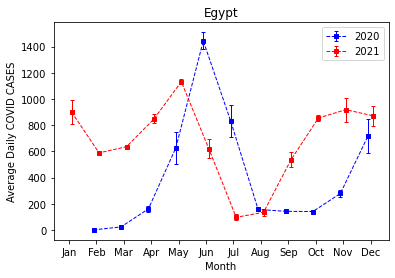

In [205]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsEgy20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsEgy21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

# Discussion

Based on the code above the results shows that
* after calculating the confidence intervals for the cases in Egypt by month and going the graph, I noticed that they are all overlapping wich shiws that tere is no segnificant difference between the cases during the mentioned months.
Next I got the mean, standard deviation, the size, the lower band and the upper band of the confidence interval for each month and the I did a graph that shows us the evolution of the cases during 2020. 
According to the graph we notice that the total cases is not constant, in fact it increases and decreases every two-three months.                     

Later I did the same graph but only for 2021 and I studied different countries and how it was affected. I noticed that the infection rate is not the same for all the countries for example, and based on the graphs, the dcases increases exponentially in Africa while in Egypt it does not. This is due to many factors for example the income of the citizens. In fact the mean of the income of citizens in Egypt is higher than the the mean of the income of citizens in Africa, and this may be a factor that leads citizens to not abide by the quarantines and go out in order to work which leads to the spreading and increasing of the cases.
Later I compared between 2020 and 2021 in terms of the casesx in Egypt. What I notices is that from January until May, the number of the cases in 2021 is higher than the number of cases in 2020. Then from May until Augst, the number of cases during 2020 is higher than the number of cases during 2021. And from August the number of cases during 2021 inreased compared to its number in 2020 and by Dcember the number during 2020 and 2021 is almost the same. But while it was increasing during the end of 2020 it is decreasing by the end of 2021.
conclusion:               
The number of dcases gets affected by the income of the continent, and it varies from a region to another, and also from a year to another. Its spreading does not have a specific rate: it does not continuously increase or continuously decrease. In fact it varies from a day to another, just like it was shown on the graphs above. 